# Oppgave 3: Datasett

In [3]:
import pandas as pd
import httpagentparser

In [4]:
df = pd.read_csv("03-sikkerhet.csv", delimiter=";")
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,30.05.2023 06:33,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,26.08.2020 07:08,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,13.11.2022 08:23,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,02.07.2023 10:38,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,16.07.2023 13:11,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,26.05.2023 14:08,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,27.03.2023 00:38,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,31.03.2022 01:45,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,22.09.2023 18:32,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


## Del 1

De 3 mest brukte, og eneste protokollene brukt i datasettet er `ICMP`, `UDP` og `TCP`.
- `ICMP`: $13429$
- `UDP`: $13299$
- `TCP`: $13272$

Alle tre blir brukt omtrent like mange ganger, som illustrert i figuren.

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

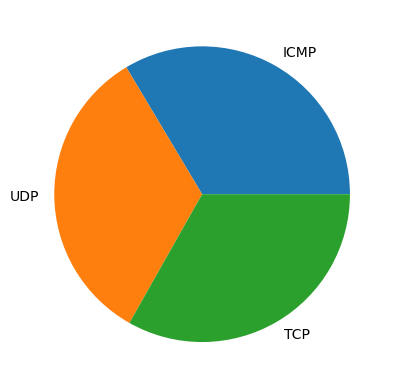

In [20]:
protocols = df["Protocol"].value_counts()
protocols.plot(kind="pie", ylabel="")
protocols

## Del 2

Det finnes tre ulike typer `"Attack Type"`. Av disse er DDos den mest brukte, der den mest brukte er `DDos`.
- DDoS (Distributed Denial of Service): $13428$
- Malware: $13307$
- Intrusion: $13265$

Som i den siste oppgaven, ser jeg også her at fordelingen er ganske jevn mellom de ulike typene.

In [6]:
df["Attack Type"].unique() # Redundant, could get same info from value_counts

array(['Malware', 'DDoS', 'Intrusion'], dtype=object)

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

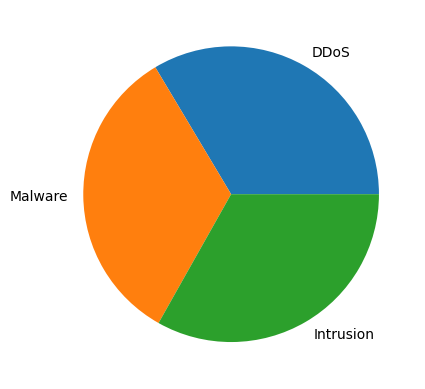

In [7]:
attacks = df["Attack Type"].value_counts()
attacks.plot(kind="pie", ylabel="")
attacks

## Del 3

Jeg ser at det operativsystemet som blir oftest brukt av alle, er `Windows`, på $17953$, mens `MacOS` er på tredjeplass, med $5813$, onmtrent $\dfrac{1}{3}$ av `Windows`.

Device
Windows    17953
Linux       7171
MacOS       5813
iPhone      4223
Android     3289
IPad        1551
Name: count, dtype: int64

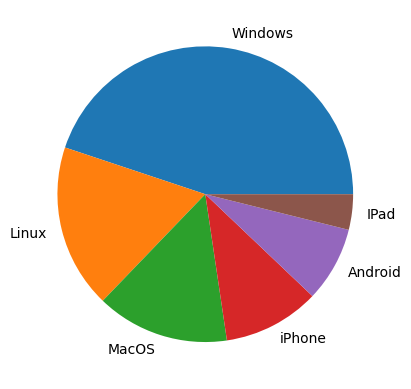

In [21]:
# The below code is much cleaner.
# The problem is that the variable `m` is evaluated lazily
# This means that when the function is called multiple times,
# every single return value will be equal to that of the
# *last* item in the list, rather than the function getting applied for all.
# It seems there are no good solutions for this :(
r"""
def get_device(device_info):
    m = re.search(r"\(.*?;.*?;(.*?);", d)
    if m:
        return m.group(1)
    return "unknown"

df["Device"] = df["Device Information"].apply(get_device)
"""

# https://stackoverflow.com/a/9209931
def get_device(ua):
    os, browser = httpagentparser.simple_detect(ua)
    # Heg velger jeg å gjøre det *litt* annerledes enn oppgaven
    # Den spør om "Macintosh", men jeg velger å bare ta første ord
    # , altså "MacOS".
    return os.split()[0]

df["Device"] = df["Device Information"].apply(get_device)
devices = df["Device"].value_counts()

devices.plot(kind="pie", ylabel="")
devices